In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
filename = "properties.csv"
df = pd.read_csv(filename)
df.head()

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


In [9]:
df.shape

(75511, 30)

In [10]:
# Check how many rows of each attribute are NaN
df.isnull()


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75506,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,True
75507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
75508,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
75509,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False


In [11]:
# Identify columns with more than 10000 missing values
missing_values_count = df.isnull().sum()
columns_with_many_missing = missing_values_count[missing_values_count > 10000]
print(columns_with_many_missing.index)

# Drop the columns
df.drop(columns=columns_with_many_missing.index, inplace=True)

print("Dropped columns:")
print(columns_with_many_missing)

Index(['latitude', 'longitude', 'construction_year', 'surface_land_sqm',
       'nbr_frontages', 'terrace_sqm', 'primary_energy_consumption_sqm',
       'cadastral_income'],
      dtype='object')
Dropped columns:
latitude                          14098
longitude                         14098
construction_year                 33391
surface_land_sqm                  36256
nbr_frontages                     26346
terrace_sqm                       13140
primary_energy_consumption_sqm    26567
cadastral_income                  44967
dtype: int64


In [12]:
# Print the dtype of every attribute
df.dtypes

id                     int64
price                float64
property_type         object
subproperty_type      object
region                object
province              object
locality              object
zip_code               int64
total_area_sqm       float64
nbr_bedrooms         float64
equipped_kitchen      object
fl_furnished           int64
fl_open_fire           int64
fl_terrace             int64
fl_garden              int64
garden_sqm           float64
fl_swimming_pool       int64
fl_floodzone           int64
state_building        object
epc                   object
heating_type          object
fl_double_glazing      int64
dtype: object

In [13]:
# Print the number of unique values of each column
unique_counts = df.nunique()
columns_with_few_unique = unique_counts
print(columns_with_few_unique)

id                   48817
price                 8274
property_type            2
subproperty_type        23
region                   4
province                12
locality                44
zip_code              1076
total_area_sqm         951
nbr_bedrooms            47
equipped_kitchen         9
fl_furnished             2
fl_open_fire             2
fl_terrace               2
fl_garden                2
garden_sqm            1493
fl_swimming_pool         2
fl_floodzone             2
state_building           7
epc                     10
heating_type             8
fl_double_glazing        2
dtype: int64


In [14]:
df.describe(include="all").T  # Transpose the data frame so that it fits in a cell

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,75511.0,NaN,NaN,NaN,39732354.597343,22904173.007541,0.0,19893500.0,39722000.0,59541000.0,79485000.0
price,75511.0,NaN,NaN,NaN,422770.850737,438358.563834,76000.0,242000.0,329000.0,455000.0,22500000.0
property_type,75511,2,HOUSE,39255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subproperty_type,75511,23,HOUSE,29730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,75511,4,Flanders,43424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province,75511,12,West Flanders,11798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locality,75511,44,Brussels,7958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,75511.0,NaN,NaN,NaN,5144.609342,3005.49011,1000.0,2240.0,4683.0,8370.0,9992.0
total_area_sqm,67896.0,NaN,NaN,NaN,163.670746,415.851108,3.0,91.0,127.0,185.0,88140.0
nbr_bedrooms,75511.0,NaN,NaN,NaN,2.787276,1.894188,0.0,2.0,3.0,3.0,200.0


In [15]:
# There are no duplicates
df.duplicated().any()

np.False_

In [16]:
df.columns

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'total_area_sqm', 'nbr_bedrooms',
       'equipped_kitchen', 'fl_furnished', 'fl_open_fire', 'fl_terrace',
       'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'fl_floodzone',
       'state_building', 'epc', 'heating_type', 'fl_double_glazing'],
      dtype='object')

In [17]:
#Preprocessing

In [18]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 9
Integer variables: 9
Float variables: 4


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import seaborn as sns

<Axes: >

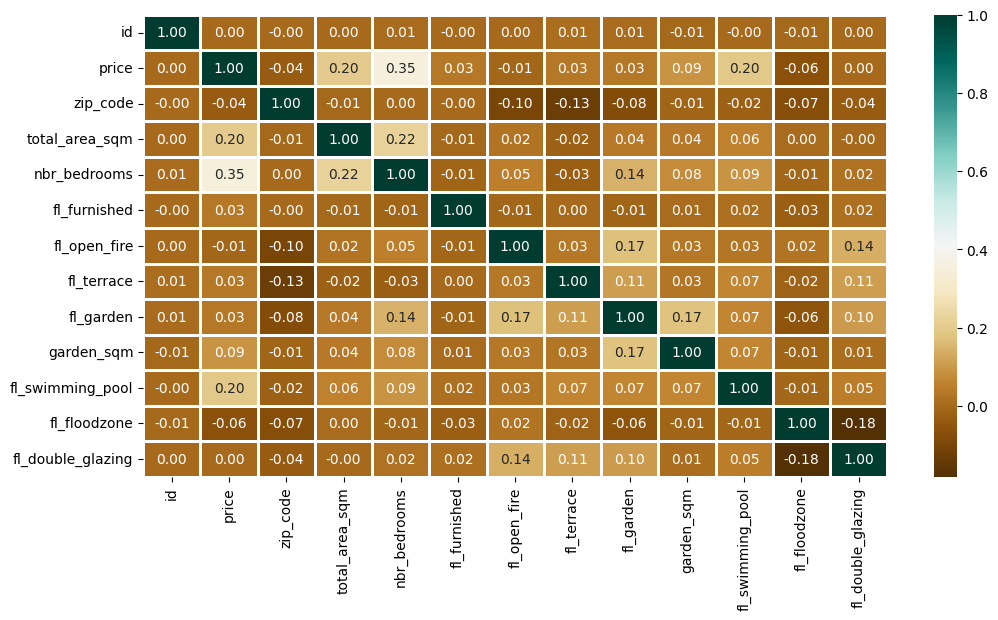

In [21]:
# Select only numerical features for correlation analysis
numerical_dataset = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

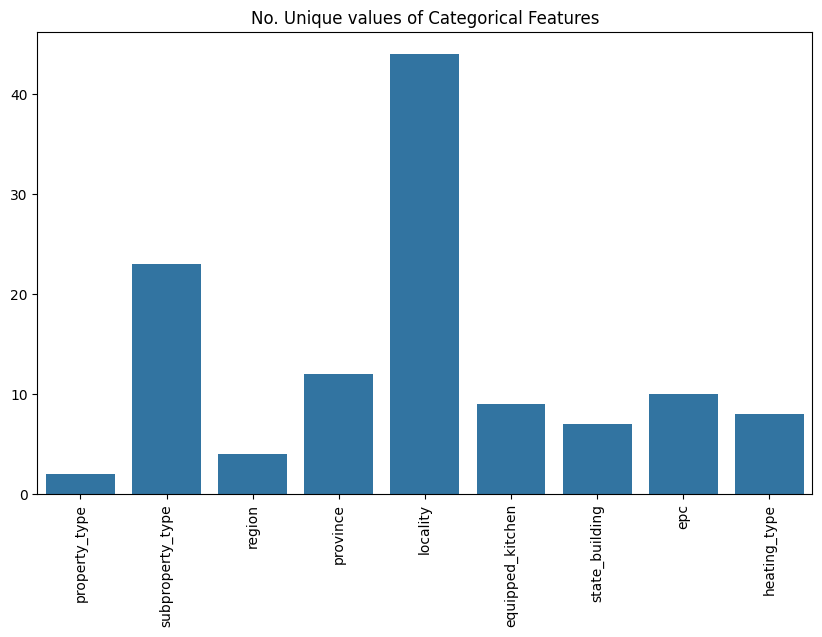

In [22]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

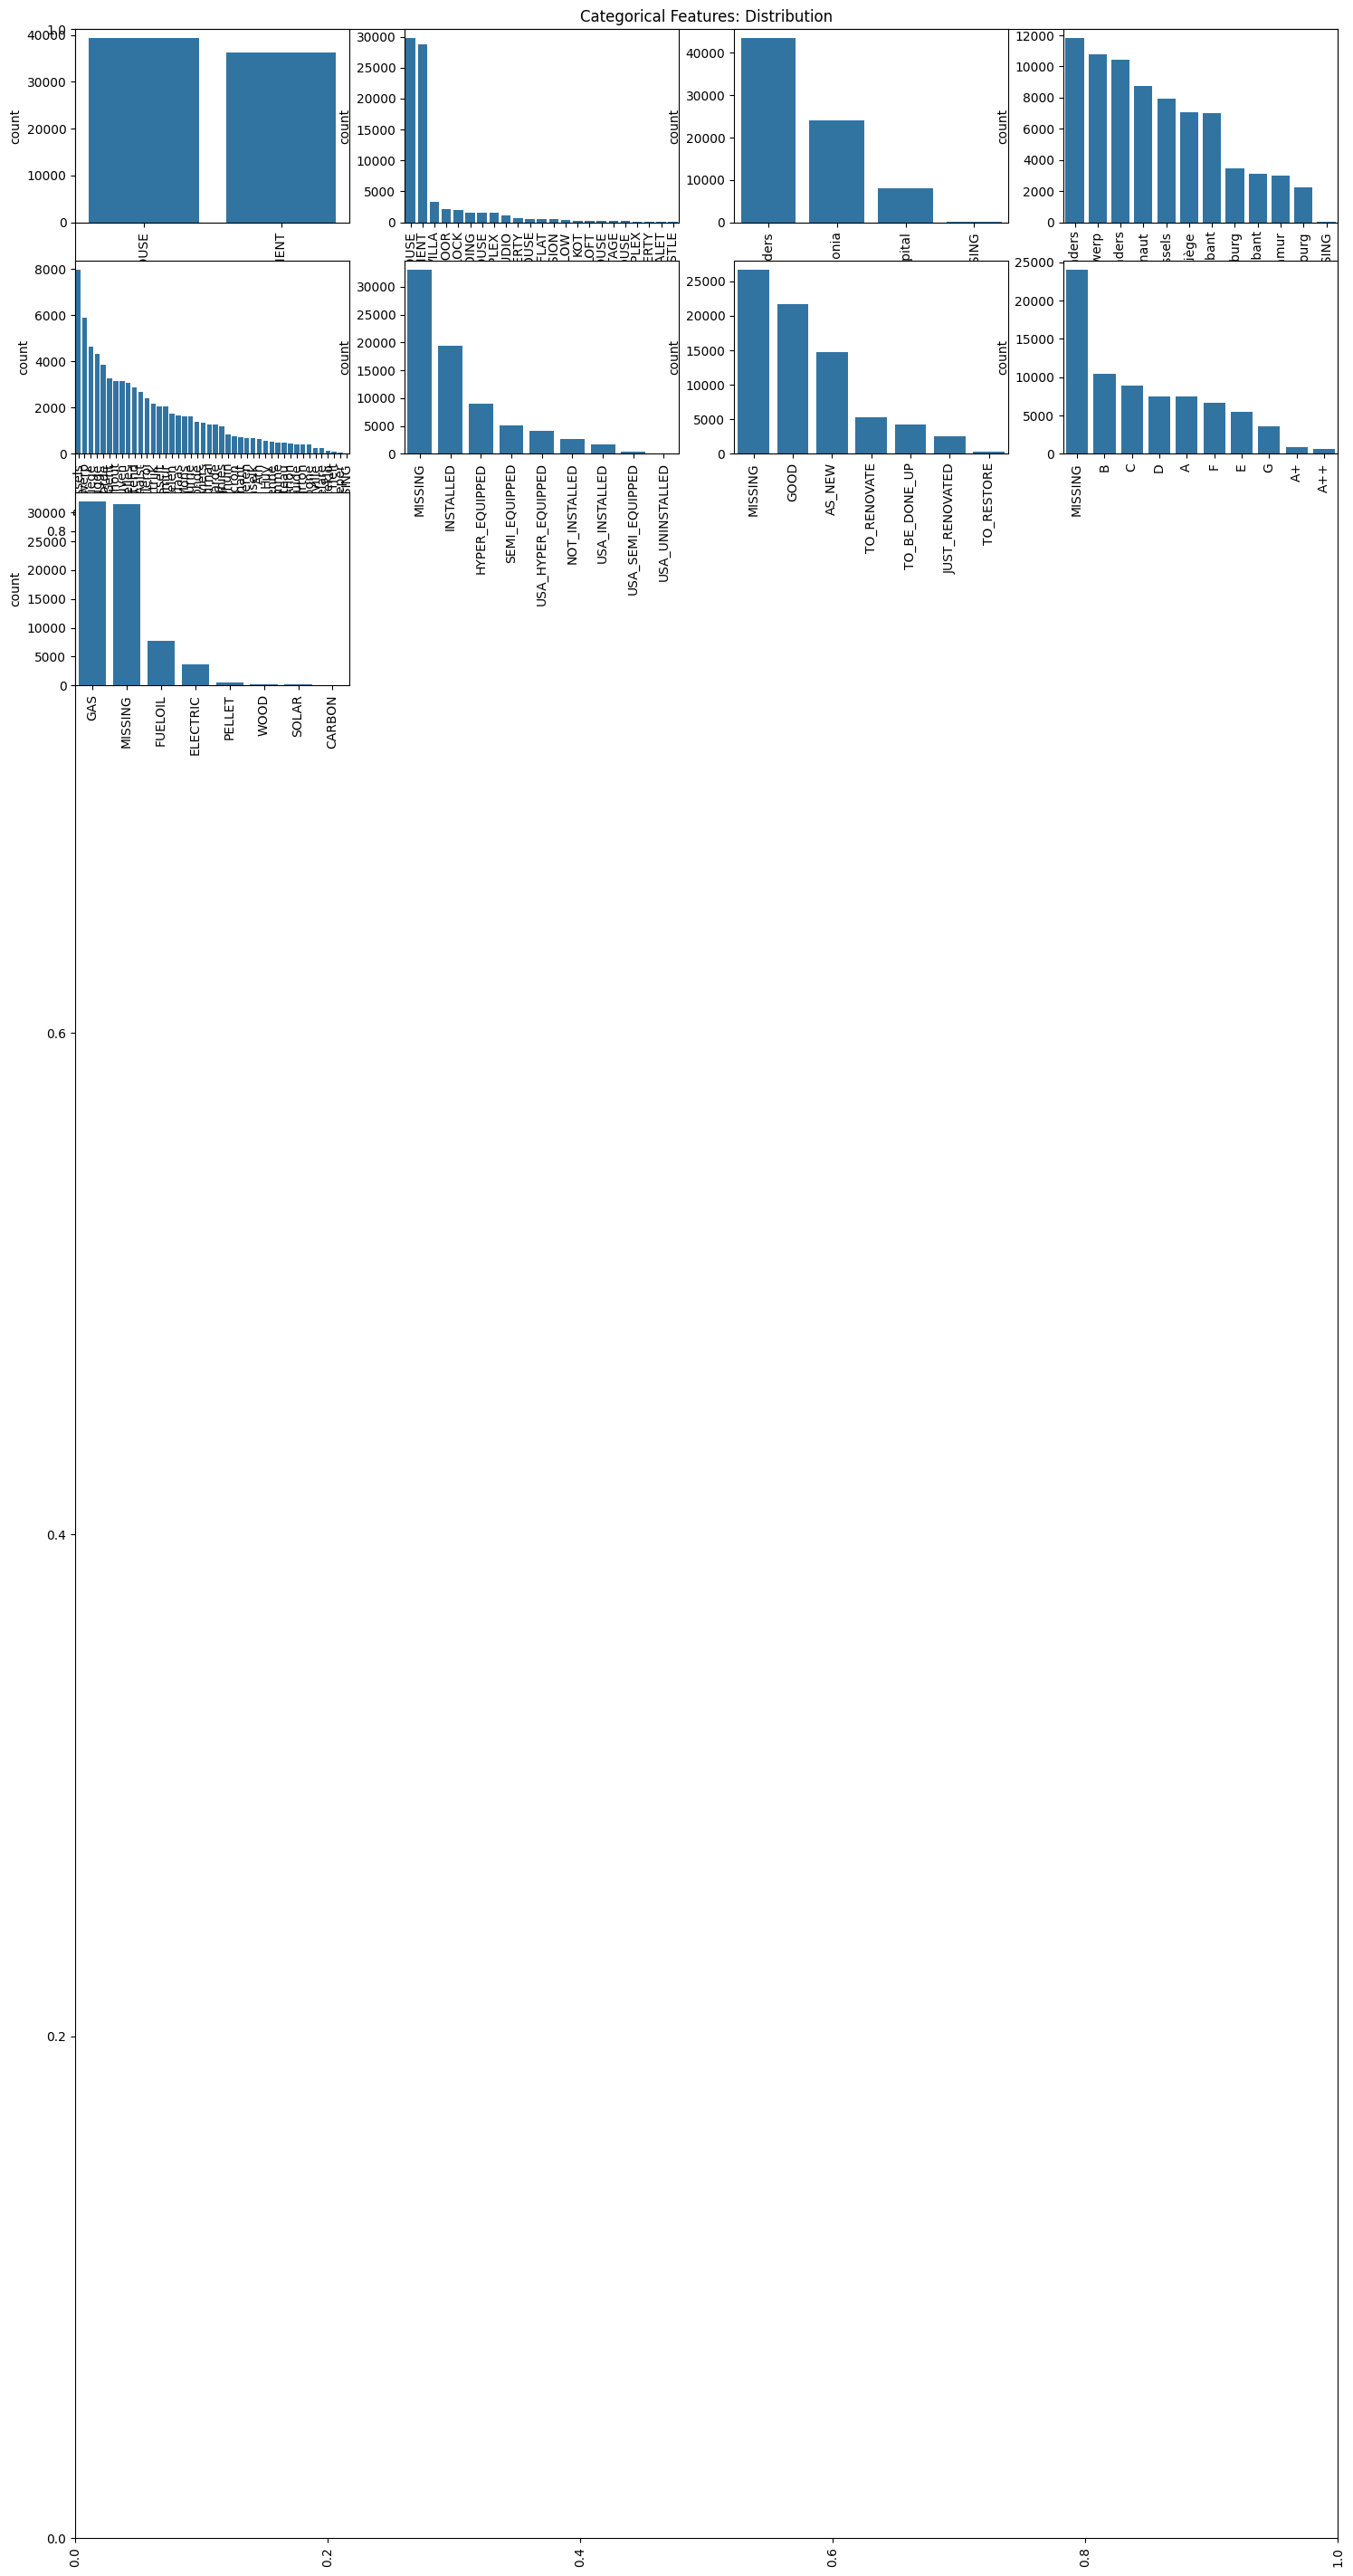

In [23]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [24]:
df.drop(['id'],
             axis=1,
             inplace=True)

In [45]:
df['price'] = df['price'].fillna(
  df['price'].mean()) 

df.isnull().sum()

price                   0
property_type           0
subproperty_type        0
region                  0
province                0
locality                0
zip_code                0
total_area_sqm       7615
nbr_bedrooms            0
equipped_kitchen        0
fl_furnished            0
fl_open_fire            0
fl_terrace              0
fl_garden               0
garden_sqm           2939
fl_swimming_pool        0
fl_floodzone            0
state_building          0
epc                     0
heating_type            0
fl_double_glazing       0
dtype: int64

In [26]:
new_dataset = df.dropna()

In [27]:
new_dataset.isnull().sum()

price                0
property_type        0
subproperty_type     0
region               0
province             0
locality             0
zip_code             0
total_area_sqm       0
nbr_bedrooms         0
equipped_kitchen     0
fl_furnished         0
fl_open_fire         0
fl_terrace           0
fl_garden            0
garden_sqm           0
fl_swimming_pool     0
fl_floodzone         0
state_building       0
epc                  0
heating_type         0
fl_double_glazing    0
dtype: int64

In [28]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['property_type', 'subproperty_type', 'region', 'province', 'locality', 'equipped_kitchen', 'state_building', 'epc', 'heating_type']
No. of. categorical features:  9


In [29]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['price'], axis=1)
Y = df_final['price']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [31]:
#SVM – Support vector Machine

In [32]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.4255952054042048


In [33]:
#Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

np.float64(0.199653857938792)

In [35]:
#Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.39468923947084456


In [37]:
new_dataset

,price,property_type,subproperty_type,region,province,locality,zip_code,total_area_sqm,nbr_bedrooms,equipped_kitchen,...,fl_open_fire,fl_terrace,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,epc,heating_type,fl_double_glazing
0,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,100.0,2.0,INSTALLED,...,0,1,0,0.0,0,0,MISSING,C,GAS,1
2,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,142.0,3.0,INSTALLED,...,0,1,0,0.0,0,1,AS_NEW,MISSING,GAS,0
3,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,187.0,3.0,MISSING,...,0,0,0,0.0,0,1,MISSING,A,MISSING,0
4,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,169.0,2.0,HYPER_EQUIPPED,...,0,1,1,142.0,0,0,AS_NEW,A+,GAS,0
5,548514.0,HOUSE,HOUSE,Flanders,Flemish Brabant,Halle-Vilvoorde,1700,187.0,3.0,MISSING,...,0,0,0,0.0,0,1,AS_NEW,MISSING,MISSING,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75505,199000.0,APARTMENT,APARTMENT,Wallonia,Liège,Liège,4100,89.0,2.0,INSTALLED,...,0,1,0,0.0,0,0,GOOD,C,GAS,1
75506,210000.0,APARTMENT,APARTMENT,Wallonia,Hainaut,Tournai,7640,73.0,1.0,INSTALLED,...,0,1,0,0.0,0,1,AS_NEW,MISSING,MISSING,1
75507,780000.0,APARTMENT,PENTHOUSE,Brussels-Capital,Brussels,Brussels,1200,141.0,3.0,USA_HYPER_EQUIPPED,...,0,1,0,0.0,0,0,AS_NEW,B,GAS,1
75508,798000.0,HOUSE,MIXED_USE_BUILDING,Brussels-Capital,Brussels,Brussels,1080,400.0,9.0,MISSING,...,0,1,0,0.0,0,1,TO_RENOVATE,G,GAS,0


In [38]:
new_dataset['region'].unique()

array(['Flanders', 'Brussels-Capital', 'Wallonia', 'MISSING'],
      dtype=object)

In [39]:
from sklearn.preprocessing import OneHotEncoder
# Apply OneHotEncoder to the 'region' column
region_encoded = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')
region_encoded1 = region_encoded.fit_transform(new_dataset[['region']])
region_encoded1

new_dataset = pd.concat([new_dataset, region_encoded1], axis=1).drop(columns=['region'])
new_dataset.head()

,price,property_type,subproperty_type,province,locality,zip_code,total_area_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,...,fl_swimming_pool,fl_floodzone,state_building,epc,heating_type,fl_double_glazing,region_Brussels-Capital,region_Flanders,region_MISSING,region_Wallonia
0,225000.0,APARTMENT,APARTMENT,Antwerp,Antwerp,2050,100.0,2.0,INSTALLED,0,...,0,0,MISSING,C,GAS,1,0.0,1.0,0.0,0.0
2,335000.0,APARTMENT,APARTMENT,Brussels,Brussels,1070,142.0,3.0,INSTALLED,0,...,0,1,AS_NEW,MISSING,GAS,0,1.0,0.0,0.0,0.0
3,501000.0,HOUSE,HOUSE,Antwerp,Turnhout,2275,187.0,3.0,MISSING,0,...,0,1,MISSING,A,MISSING,0,0.0,1.0,0.0,0.0
4,982700.0,APARTMENT,DUPLEX,Walloon Brabant,Nivelles,1410,169.0,2.0,HYPER_EQUIPPED,0,...,0,0,AS_NEW,A+,GAS,0,0.0,0.0,0.0,1.0
5,548514.0,HOUSE,HOUSE,Flemish Brabant,Halle-Vilvoorde,1700,187.0,3.0,MISSING,0,...,0,1,AS_NEW,MISSING,MISSING,0,0.0,1.0,0.0,0.0


In [40]:
new_dataset['equipped_kitchen'].unique()

array(['INSTALLED', 'MISSING', 'HYPER_EQUIPPED', 'NOT_INSTALLED',
       'USA_HYPER_EQUIPPED', 'SEMI_EQUIPPED', 'USA_INSTALLED',
       'USA_SEMI_EQUIPPED', 'USA_UNINSTALLED'], dtype=object)

In [41]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

kit = ['MISSING', 'NOT_INSTALLED', 'USA_UNINSTALLED', 'SEMI_EQUIPPED', 'USA_SEMI_EQUIPPED', 'INSTALLED', 'USA_INSTALLED', 'HYPER_EQUIPPED', 'USA_HYPER_EQUIPPED']

# Initialize the OrdinalEncoder
equipped_kitchen_encoded = OrdinalEncoder(categories=[kit])

# Apply the encoder to the 'equipped_kitchen' column
equipped_kitchen_encoded.fit_transform(new_dataset[['equipped_kitchen']])

# Display the first few rows to verify the encoding
new_dataset['kit'] = equipped_kitchen_encoded.fit_transform(new_dataset[['equipped_kitchen']])
new_dataset.drop(columns=['equipped_kitchen'])
new_dataset.head()

,price,property_type,subproperty_type,province,locality,zip_code,total_area_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,...,fl_floodzone,state_building,epc,heating_type,fl_double_glazing,region_Brussels-Capital,region_Flanders,region_MISSING,region_Wallonia,kit
0,225000.0,APARTMENT,APARTMENT,Antwerp,Antwerp,2050,100.0,2.0,INSTALLED,0,...,0,MISSING,C,GAS,1,0.0,1.0,0.0,0.0,5.0
2,335000.0,APARTMENT,APARTMENT,Brussels,Brussels,1070,142.0,3.0,INSTALLED,0,...,1,AS_NEW,MISSING,GAS,0,1.0,0.0,0.0,0.0,5.0
3,501000.0,HOUSE,HOUSE,Antwerp,Turnhout,2275,187.0,3.0,MISSING,0,...,1,MISSING,A,MISSING,0,0.0,1.0,0.0,0.0,0.0
4,982700.0,APARTMENT,DUPLEX,Walloon Brabant,Nivelles,1410,169.0,2.0,HYPER_EQUIPPED,0,...,0,AS_NEW,A+,GAS,0,0.0,0.0,0.0,1.0,7.0
5,548514.0,HOUSE,HOUSE,Flemish Brabant,Halle-Vilvoorde,1700,187.0,3.0,MISSING,0,...,1,AS_NEW,MISSING,MISSING,0,0.0,1.0,0.0,0.0,0.0


In [42]:
from scipy import stats

# Calculate the Z-scores of the numerical columns
z_scores = stats.zscore(new_dataset.select_dtypes(include=['float64', 'int64']))

# Create a boolean mask for rows where all Z-scores are less than the threshold (3)
mask = (abs(z_scores) < 3).all(axis=1)

# Apply the mask to filter out the outliers
new_dataset_no_outliers = new_dataset[mask]

# Display the shape of the dataset before and after removing outliers
print("Original dataset shape:", new_dataset.shape)
print("Dataset shape after removing outliers:", new_dataset_no_outliers.shape)

Original dataset shape: (65169, 25)
Dataset shape after removing outliers: (61155, 25)


In [43]:
# Print the number of unique values of each column
unique_counts = new_dataset_no_outliers.nunique()
columns_with_few_unique = unique_counts
print(columns_with_few_unique)

price                      7240
property_type                 2
subproperty_type             23
province                     11
locality                     43
zip_code                   1043
total_area_sqm              717
nbr_bedrooms                  8
equipped_kitchen              9
fl_furnished                  1
fl_open_fire                  2
fl_terrace                    2
fl_garden                     2
garden_sqm                 1220
fl_swimming_pool              1
fl_floodzone                  2
state_building                7
epc                          10
heating_type                  8
fl_double_glazing             2
region_Brussels-Capital       2
region_Flanders               2
region_MISSING                1
region_Wallonia               2
kit                           9
dtype: int64


In [44]:
# Apply OneHotEncoder to the 'region' column
region_encoded = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')
region_encoded1 = region_encoded.fit_transform(new_dataset[['region']])
region_encoded1

new_dataset = pd.concat([new_dataset, region_encoded1], axis=1).drop(columns=['region'])
new_dataset.head()

KeyError: "None of [Index(['region'], dtype='object')] are in the [columns]"

In [ ]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   -- ------------------------------------- 9.2/124.9 MB 47.4 MB/s eta 0:00:03
   ----- ---------------------------------- 15.7/124.9 MB 36.7 MB/s eta 0:00:03
   ------- -------------------------------- 23.1/124.9 MB 40.5 MB/s eta 0:00:03
   ------- -------------------------------- 23.1/124.9 MB 40.5 MB/s eta 0:00:03
   ------- -------------------------------- 23.1/124.9 MB 40.5 MB/s eta 0:00:03
   ------- -------------------------------- 23.1/124.9 MB 40.5 MB/s eta 0:00:03
   --------- ------------------------------ 29.4/124.9 MB 19.4 MB/s eta 0:00:05
   ------------- -------------------------- 42.7/124.9 MB 24.9 MB/s eta 0:00:04
   ---------------- ----------------------- 51.4/124.9 MB 26.6 MB/s eta 0:00:03
   -------------------- ------------------- 64.5/124.9 MB 29.6 MB/s eta 0:00:03
   ------------------------- -------------- 78.9/124.9 MB 32.3 MB/s eta 0:00:02
   ----------------------------- ---------- 92.0/1


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np 
import pandas as pd 
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 
  
# Load the data 
X, y = new_dataset.iloc[:, :-1], new_dataset.iloc[:, -1] 
  
# Splitting 
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                      test_size = 0.3, random_state = 123) 
  
# Instantiation 
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 
  
# Fitting the model 
xgb_r.fit(train_X, train_y) 
  
# Predict the model 
pred = xgb_r.predict(test_X) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 

NameError: name 'new_dataset' is not defined